step1: data preprocessing and model building

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


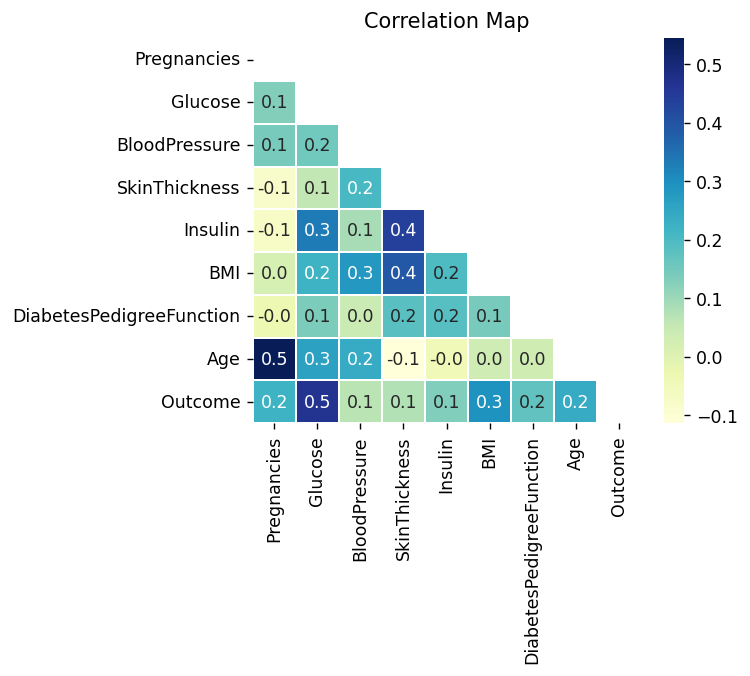

In [25]:
#correlation map without any preprocessing

plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [24]:
#remove 0 value

print('Glucose empty: '+ str(df[df['Glucose'] == 0].shape[0]))
print('BloodPressure values empty: '+ str(df[df['BloodPressure'] == 0].shape[0]))
print('SkinThickness values empty: '+ str(df[df['SkinThickness'] == 0].shape[0]))
print('Insulin values empty: '+ str(df[df['Insulin'] == 0].shape[0]))
print('BMI values empty: '+ str(df[df['BMI'] == 0].shape[0]))
print('DiabetesPedigreeFunction values empty: '+ str(df[df['DiabetesPedigreeFunction'] == 0].shape[0]))
print('Age values empty: '+ str(df[df['Age'] == 0].shape[0]))


Glucose empty: 5
BloodPressure values empty: 35
SkinThickness values empty: 227
Insulin values empty: 374
BMI values empty: 11
DiabetesPedigreeFunction values empty: 0
Age values empty: 0


In [27]:
def replace_zero(df):
    df_nan = df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan

df_nan=replace_zero(df)

#finds the median of different attribute based on Outcome
def find_median(df, col):
    
    df_nondiab = df[df['Outcome']==0].reset_index(drop = True)
    df_diab = df[df['Outcome']==1].reset_index(drop = True)
    return(df_nondiab[col].median(), df_diab[col].median())

In [31]:
def replace_null(df,var):
    
    median_tuple=find_median(df,var)
    var_0 = median_tuple[0]
    var_1 = median_tuple[1]
    
    df.loc[(df['Outcome'] == 0) & (df[var].isnull()), var] = var_0
    df.loc[(df['Outcome'] == 1) & (df[var].isnull()), var] = var_1
        
    return df[var].isnull().sum()
replace_null(df_nan, 'Glucose')
replace_null(df_nan, 'BloodPressure')
replace_null(df_nan, 'SkinThickness')
replace_null(df_nan, 'Insulin')
replace_null(df_nan, 'BMI')
df_nan.isna().sum()


0

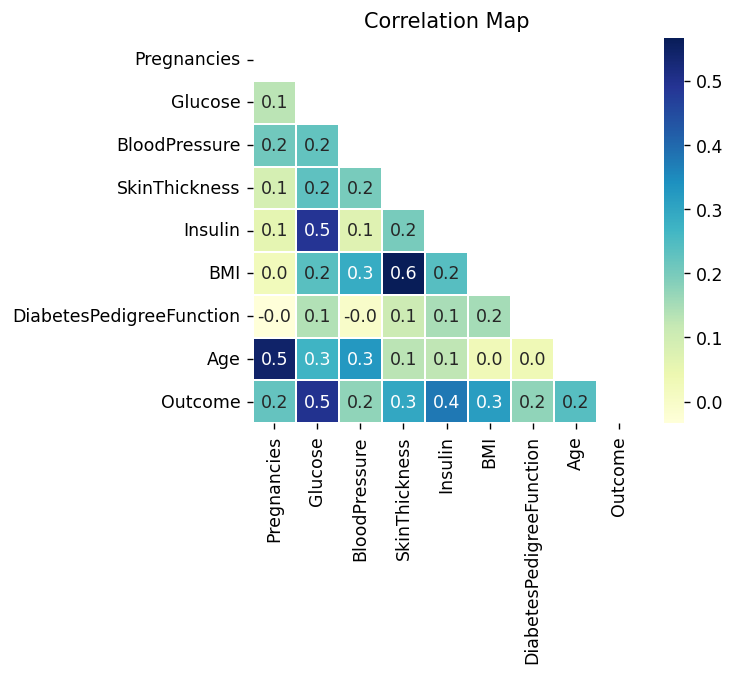

In [33]:
#correlation map after preprocessing
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df_nan.corr())
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

/var/folders/v0/xgjb19cx4d77qflxjjmdvg900000gn/T/ipykernel_21209/1691770665.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
/var/folders/v0/xgjb19cx4d77qflxjjmdvg900000gn/T/ipykernel_21209/1691770665.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

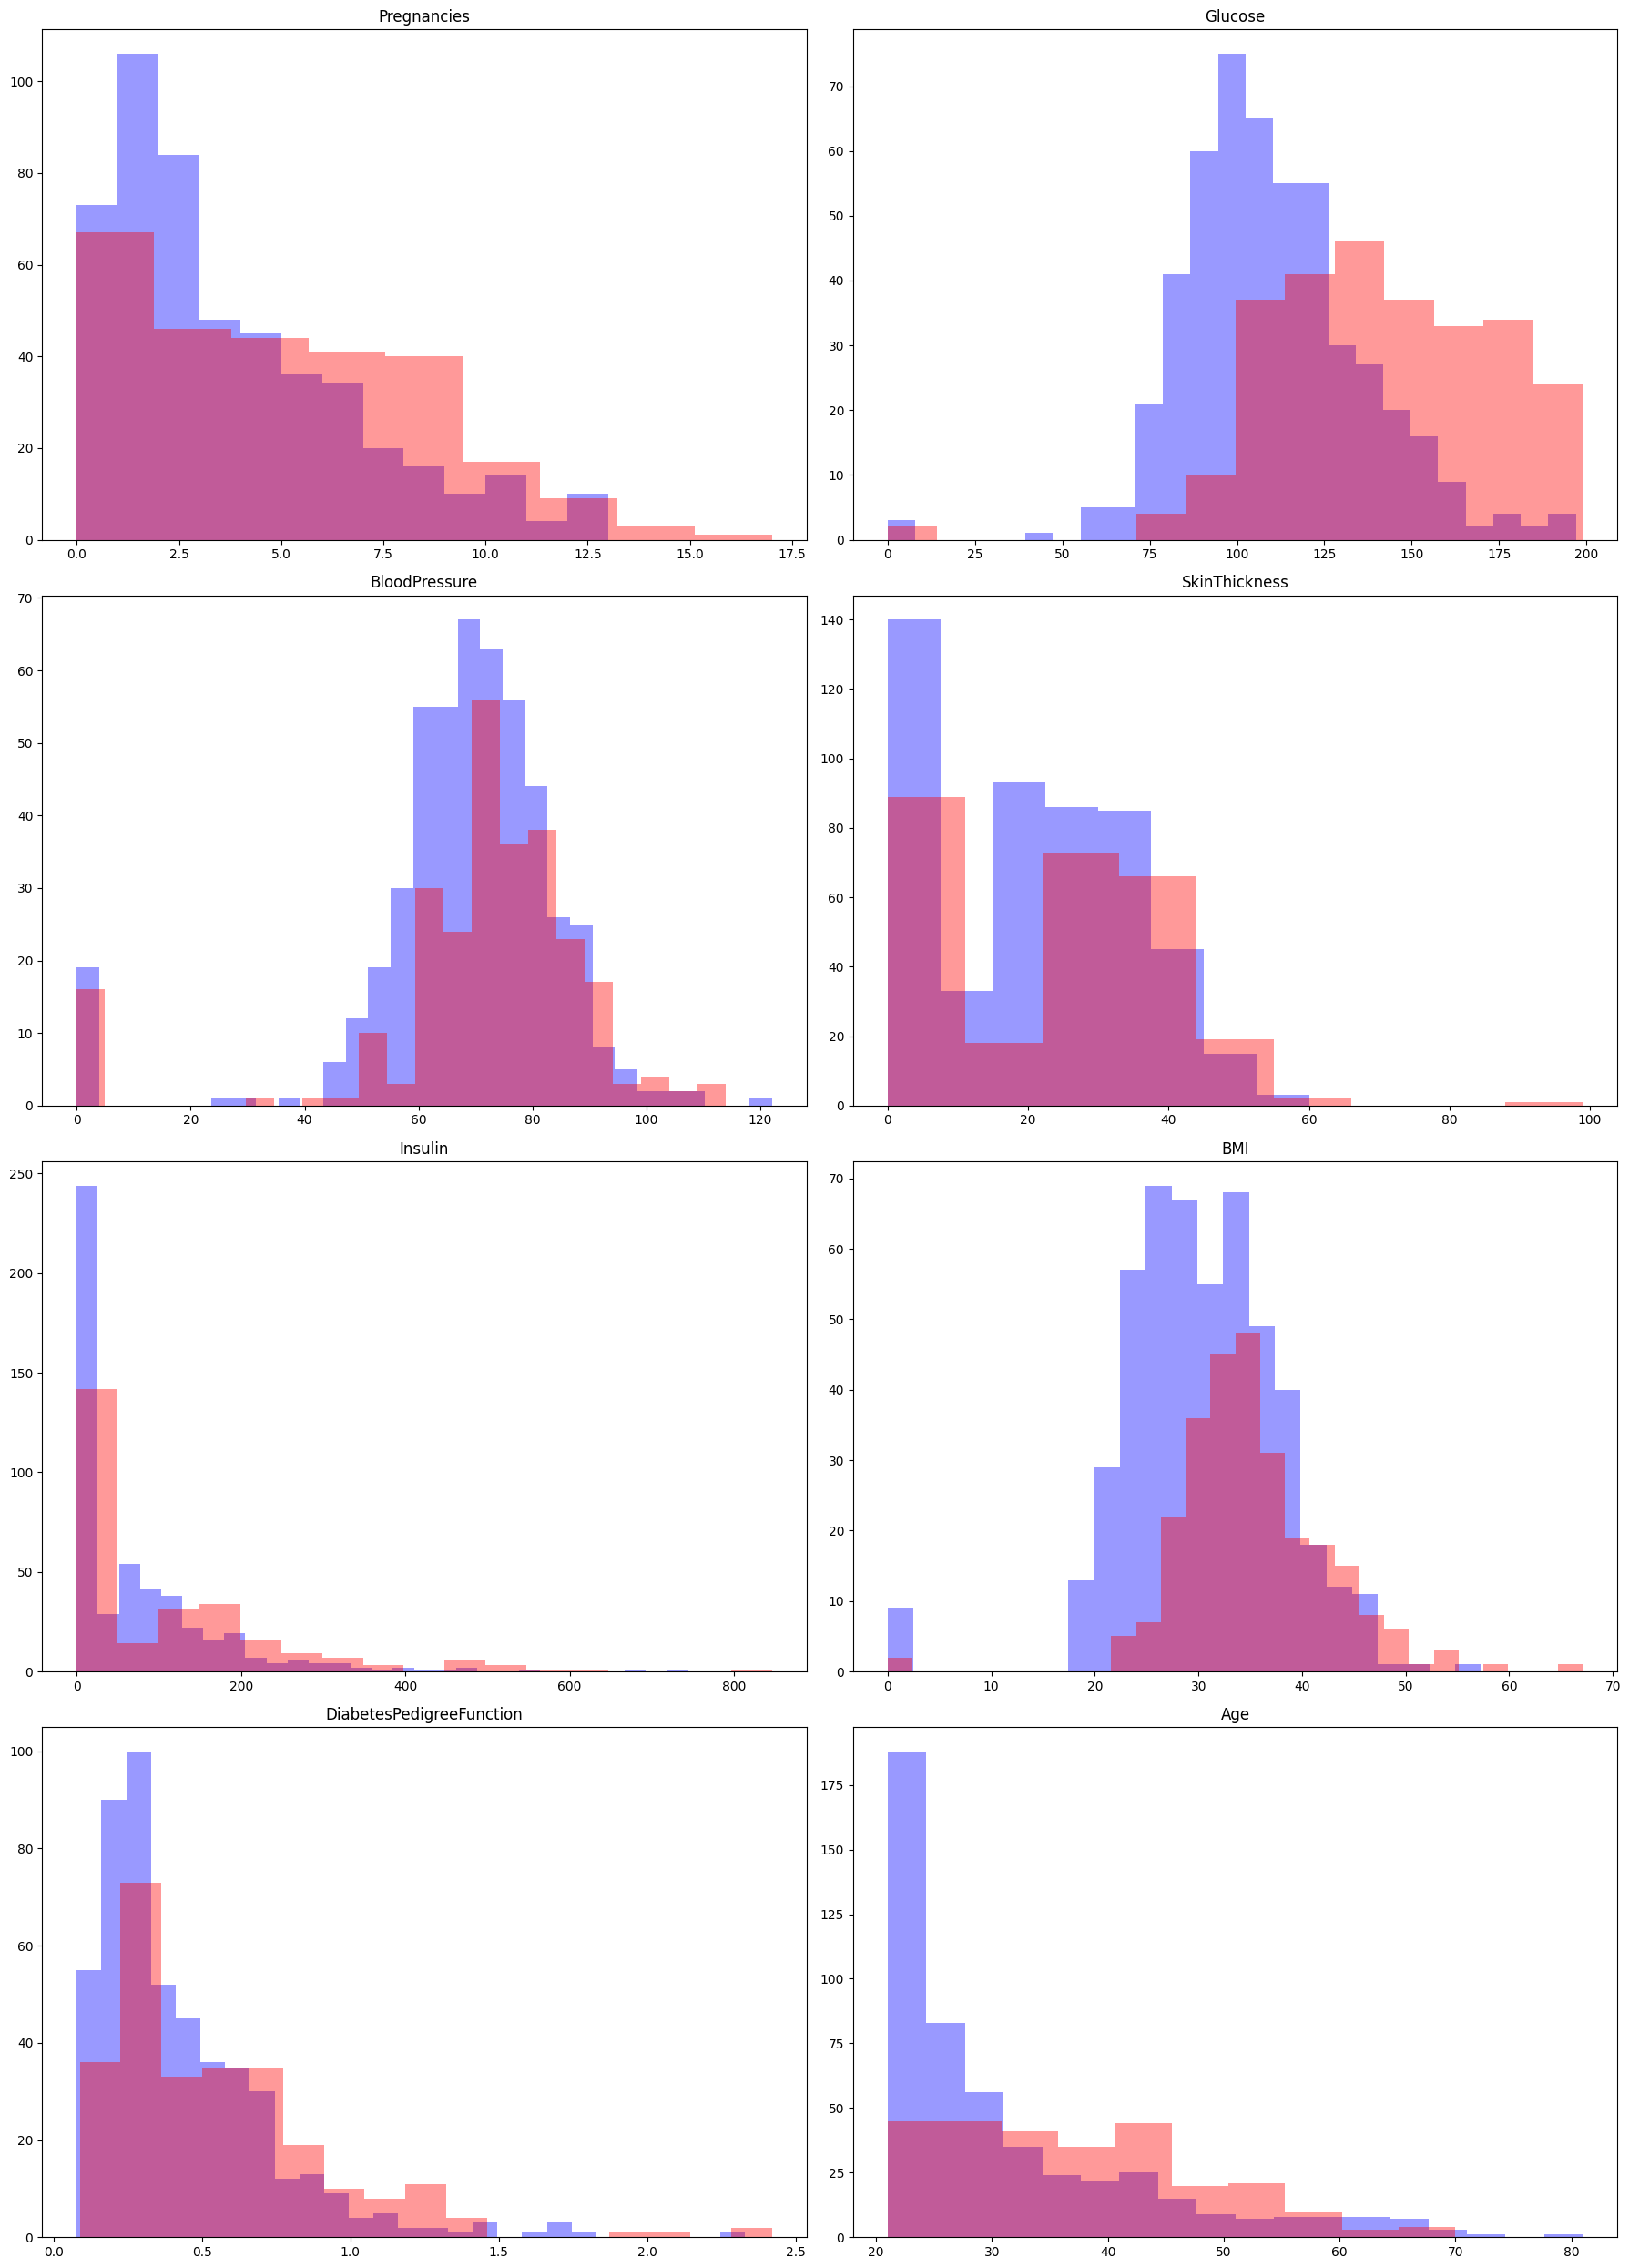

In [35]:
column_list = list(df.columns)
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(18, 25))

target_0 = df.loc[df['Outcome'] == 0]
target_1 = df.loc[df['Outcome'] == 1]

for i, subplot in zip(range(8), ax.flatten()):
    
    sns.distplot(target_0[[column_list[i]]], hist=True, color = 'blue', ax=subplot, norm_hist = False, kde = False)
    sns.distplot(target_1[[column_list[i]]], hist=True, color = 'red', ax=subplot, norm_hist = False, kde = False)
    subplot.title.set_text(column_list[i])
    plt.tight_layout()

plt.show()
    

Text(0, 0.5, 'Glucose Amount')

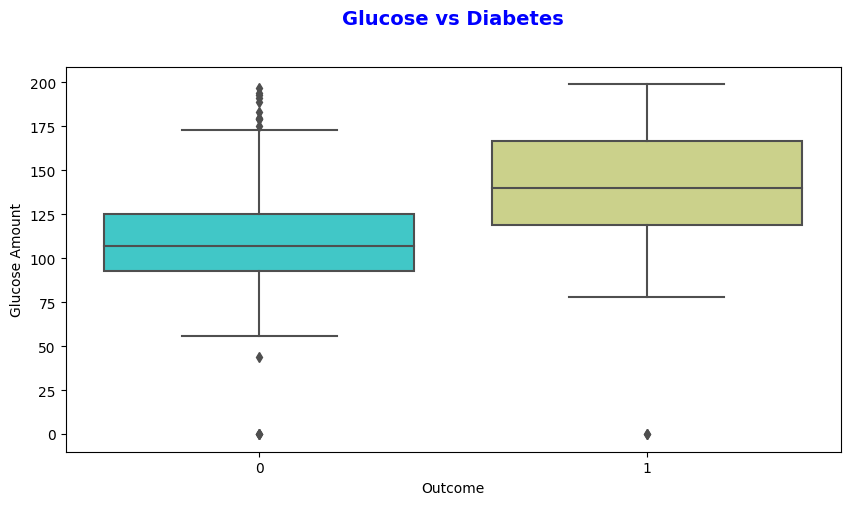

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="Outcome", y="Glucose",data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.text(x=0.5, y=1.1, s='Glucose vs Diabetes', fontsize=14, weight='bold', ha='center', va='bottom',color = 'b', transform=ax.transAxes)
  #ax.text(x=0.5, y=1.05, s='', fontsize=10, alpha=0.75,weight='bold', ha='center', va='bottom',color = 'green', transform=ax.transAxes)
ax.set_xlabel('Outcome', fontsize = 10)
ax.set_ylabel('Glucose Amount', fontsize = 10)

Step2 Modelling

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import fbeta_score, make_scorer, precision_score

Explained variation per principal component: [0.26179749 0.21640127]


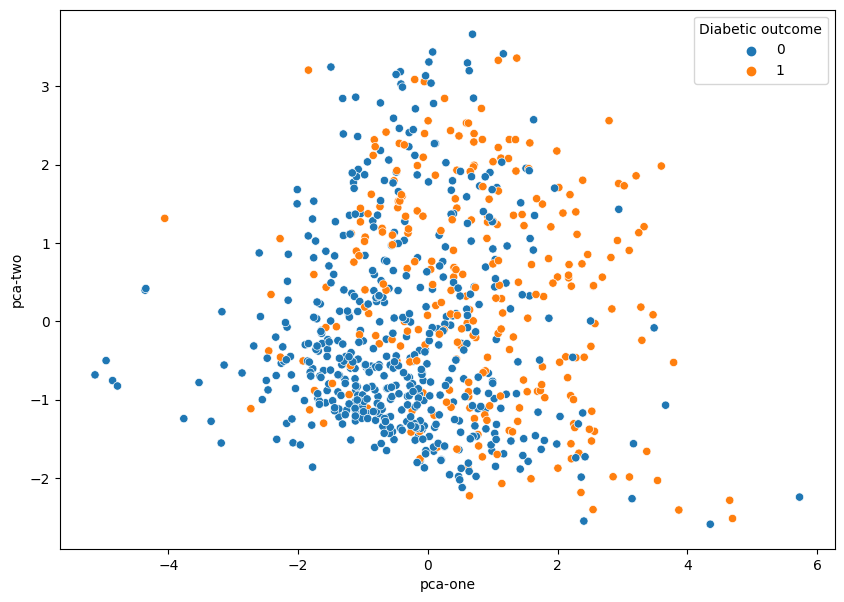

In [44]:
pca_x = df.copy()
pca_x = pca_x.drop(columns = "Outcome")
scaler = StandardScaler()
pca_x = pd.DataFrame(scaler.fit_transform(pca_x))

pca_df = pd.DataFrame(df['Outcome'])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pca_x)
pca_df['pca-one'] = pca_result[:,0]
pca_df['pca-two'] = pca_result[:,1] 
pca_df.columns = ['Diabetic outcome','pca-one', 'pca-two']
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x="pca-one", y="pca-two",hue='Diabetic outcome', data=pca_df)

In [45]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = df.copy()
Y = data.Outcome
X = data.drop("Outcome", axis = 1)
columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)

scaler = StandardScaler()
std = scaler.fit(X_train)

#save
import pickle
pickle.dump(std, open('std.pkl','wb'))


X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.531978,-0.661357,0.050887,1.937702,-0.206591,1.054221,0.631014,-0.693698
1,0.057083,-0.089557,0.050887,-1.297171,-0.692301,1.555735,1.334750,-0.608986
2,1.824269,-0.629590,0.367022,1.688865,0.841520,0.101344,-0.937667,2.525347
3,-0.826509,-0.788423,-0.265248,0.382474,0.049046,0.138958,-0.571848,-1.032545
4,1.235207,-0.820190,0.156265,-1.297171,-0.692301,0.590321,0.035783,2.017077


In [49]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 20, stratify=Y)
scaler = StandardScaler()
std = scaler.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)
X_train.head()

svm_model = svm.SVC(probability=True).fit(X_train, y_train)
svm_pred=svm_model.predict(X_test)
svm_model.score(X_test, y_test)

0.7987012987012987

In [50]:
import pickle
# Lets dump our SVM model
pickle.dump(svm_model, open('svm_model.pkl','wb'))